In [55]:
# NDVI validate
# read thru and combine with run summary
#build a pipeline to assemble all the images
#Amazon S3/planet-snowcover-experiments/planet-snowcover-2020-04-17-16-32-32-656
import pprint
import s3fs
import boto3
import io
from re import match
%matplotlib inline
import rasterio as rio
import numpy as np
p = pprint.PrettyPrinter()

fs = s3fs.S3FileSystem(session = boto3.Session(profile_name = 'esip'))
#dem only
imagery_searchpath = 's3://planet-snowcover-experiments/planet-snowcover-2020-04-17-16-32-32-656/'
#print("Searching for imagery...({})".format(imagery_searchpath))
imagery_candidates = fs.ls(imagery_searchpath)
print("candidates:")
#p.pprint(imagery_candidates)
# filter only the test scenes tiles
clipped_scenes = [link for link  in imagery_candidates if link.endswith('AnalyticMS_SR')]
p.pprint(clipped_scenes)

candidates:
['planet-snowcover-experiments/planet-snowcover-2020-04-17-16-32-32-656/planet-snowcover-imagery-ndvi-validate:20190705_171624_0f49_3B_AnalyticMS_SR',
 'planet-snowcover-experiments/planet-snowcover-2020-04-17-16-32-32-656/planet-snowcover-imagery-ndvi-validate:20190705_171625_0f49_3B_AnalyticMS_SR',
 'planet-snowcover-experiments/planet-snowcover-2020-04-17-16-32-32-656/planet-snowcover-imagery-ndvi-validate:20190705_181943_101b_3B_AnalyticMS_SR',
 'planet-snowcover-experiments/planet-snowcover-2020-04-17-16-32-32-656/planet-snowcover-imagery-ndvi-validate:20190705_181944_101b_3B_AnalyticMS_SR',
 'planet-snowcover-experiments/planet-snowcover-2020-04-17-16-32-32-656/planet-snowcover-imagery-ndvi-validate:20190705_181945_101b_3B_AnalyticMS_SR',
 'planet-snowcover-experiments/planet-snowcover-2020-04-17-16-32-32-656/planet-snowcover-imagery-ndvi-validate:20190705_181946_101b_3B_AnalyticMS_SR',
 'planet-snowcover-experiments/planet-snowcover-2020-04-17-16-32-32-656/planet-sno

In [14]:
import os
os.chdir('/home/ubuntu/planet-snowcover/experiments/ASO_Tuolumne/scripts')
for link in clipped_scenes:
    !python summarize.py --aws_profile esip {link} ~/ndvi-validate --mask_loc planet-snowcover-snow/ASO_3M_SD_USCATE_20190705_4326_binary 


Imagepath: planet-snowcover-imagery-ndvi-validate/20190705_171624_0f49_3B_AnalyticMS_SR
44 4255
100%|███████████████████████████████████████████| 44/44 [00:09<00:00,  4.88it/s]
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
Imagepath: planet-snowcover-imagery-ndvi-validate/20190705_171625_0f49_3B_AnalyticMS_SR
33 4255
100%|███████████████████████████████████████████| 33/33 [00:06<00:00,  5.15it/s]
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
Imagepath: planet-snowcover-imagery-ndvi-validate/20190705_181943_101b_3B_AnalyticMS_SR
186 4255
100%|█████████████████████████████████████████| 186/186 [00:34<00:00,  5.40it/s]
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
Imagepath: planet-snowcover-imagery-ndvi-validate/20190705_181944_101b_3B_AnalyticMS_SR
189 4255
100%|

In [15]:
ls -l

total 10304
-rw-rw-r-- 1 ubuntu ubuntu    2259 Mar  5 04:36 aftertrain.py
-rw-rw-r-- 1 ubuntu ubuntu    7409 Feb 27 23:33 compare.py
-rw-rw-r-- 1 ubuntu ubuntu    3952 Feb 27 23:33 get-modis.py
-rw-rw-r-- 1 ubuntu ubuntu    8868 Feb 27 23:33 get_sentinel.py
-rw-rw-r-- 1 ubuntu ubuntu  322120 May  4 04:45 output-dah.log
-rw-rw-r-- 1 ubuntu ubuntu     680 Mar 12 14:42 output.log
-rw-rw-r-- 1 ubuntu ubuntu  315242 Apr 20 21:40 output-ndvi.log
-rw-rw-r-- 1 ubuntu ubuntu 3625676 May 27 15:34 output-ndvi_validate.log
-rw-rw-r-- 1 ubuntu ubuntu    1673 Mar  5 04:42 output_summarize_veg.log
-rw-rw-r-- 1 ubuntu ubuntu   13396 May 28 16:42 output-veg_validate.log
-rw-rw-r-- 1 ubuntu ubuntu  306443 Mar 25 12:02 prediction_base_job_test_only.log
-rw-rw-r-- 1 ubuntu ubuntu  314434 Mar 18 05:36 prediction_base_test_only.log
-rw-rw-r-- 1 ubuntu ubuntu  318913 May  5 04:59 prediction_dem_job_test.log
-rw-rw-r-- 1 ubuntu ubuntu 2332511 Mar 13 03:04 prediction_veg_dem_job.log
-rw-rw-r-- 1 ubuntu ubuntu 

In [1]:
import os
from glob import glob

import pandas as pd 

import matplotlib.pyplot as plt

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
resultRoot = "/home/ubuntu/ndvi-validate/"

In [3]:
results = glob(os.path.join(resultRoot, "*/*/*_merged.tif"))

In [122]:
results

['/home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_181944_101b_3B_AnalyticMS_SR/preds/20190705_181944_101b_3B_AnalyticMS_SR_merged.tif',
 '/home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_181944_101b_3B_AnalyticMS_SR/mask/ASO_3M_SD_USCATE_20190705_4326_binary_merged.tif',
 '/home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_182424_0f28_3B_AnalyticMS_SR/preds/20190705_182424_0f28_3B_AnalyticMS_SR_merged.tif',
 '/home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_182424_0f28_3B_AnalyticMS_SR/mask/ASO_3M_SD_USCATE_20190705_4326_binary_merged.tif',
 '/home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowc

In [78]:
results_dirs = glob(os.path.join(resultRoot, "*"))

In [79]:
results_dirs

['/home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_181944_101b_3B_AnalyticMS_SR',
 '/home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_182424_0f28_3B_AnalyticMS_SR',
 '/home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_171624_0f49_3B_AnalyticMS_SR',
 '/home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_182533_0f17_3B_AnalyticMS_SR',
 '/home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_182422_0f28_3B_AnalyticMS_SR',
 '/home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snow

/home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_182424_0f28_3B_AnalyticMS_SR/preds/20190705_182424_0f28_3B_AnalyticMS_SR_merged.tif
[[9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]
 ...
 [9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]]


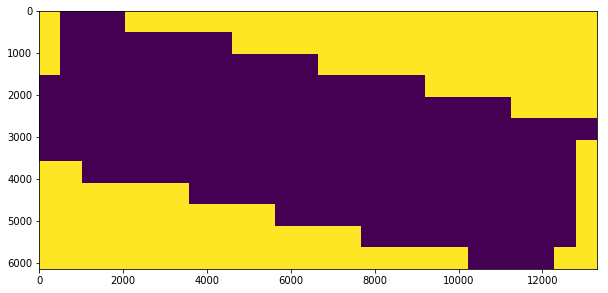

In [123]:
%matplotlib inline
import rasterio as rio
import numpy as np
from matplotlib import pyplot as plt
import rasterio.plot
import os
from datetime import datetime as dt
print(results[2])
# Load the DEM and read out a np array of the elevation values (meters):
dem = rio.open(results[2])
elev = dem.read(1)
print(elev)


# Plot this elevation band:
plt.figure(figsize=(10,10))
plt.imshow(elev)

title_text = ''
plt.title(title_text);

/home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_182424_0f28_3B_AnalyticMS_SR/mask/ASO_3M_SD_USCATE_20190705_4326_binary_merged.tif
[[9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]
 ...
 [9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]]


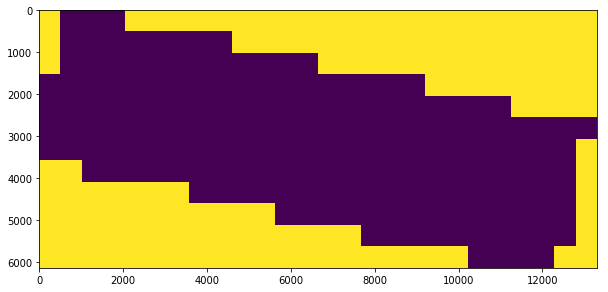

In [124]:
%matplotlib inline
import rasterio as rio
import numpy as np
from matplotlib import pyplot as plt
import rasterio.plot
import os
from datetime import datetime as dt
print(results[3])
# Load the DEM and read out a np array of the elevation values (meters):
dem = rio.open(results[3])
elev = dem.read(1)
print(elev)


# Plot this elevation band:
plt.figure(figsize=(10,10))
plt.imshow(elev)

title_text = ''
plt.title(title_text);

In [89]:
!gdalinfo {results[1]}

Driver: GTiff/GeoTIFF
Files: /home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_181944_101b_3B_AnalyticMS_SR/mask/ASO_3M_SD_USCATE_20190705_4326_binary_merged.tif
Size is 13824, 7167
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-119.542236328125000,38.134556577054127)
Pixel Size = (0.000021457672119,-0.000016894786483)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  COMPRESSION=LZW
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-119.5422363,  38.1345566) (119d32'32.05"W, 38d 8' 4.40"N)
Lower Left  (-119.5422363,  38.0134716) (119d32'32.05"W, 38d 0'48.50"N)
Upper Right (-119.2456055,  38.1345566) (119d14'44.18"W, 38d 8' 4.40"N)
Lower Right

In [95]:
!gdalinfo {results[0]}

Driver: GTiff/GeoTIFF
Files: /home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_181944_101b_3B_AnalyticMS_SR/preds/20190705_181944_101b_3B_AnalyticMS_SR_merged.tif
Size is 13824, 7168
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-119.542236328125000,38.134556577054127)
Pixel Size = (0.000021457672119,-0.000016890791833)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  COMPRESSION=LZW
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-119.5422363,  38.1345566) (119d32'32.05"W, 38d 8' 4.40"N)
Lower Left  (-119.5422363,  38.0134834) (119d32'32.05"W, 38d 0'48.54"N)
Upper Right (-119.2456055,  38.1345566) (119d14'44.18"W, 38d 8' 4.40"N)
Lower Righ

In [98]:
reproject_image_to_master(results[1],results[0])

'/home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_181944_101b_3B_AnalyticMS_SR/preds/20190705_181944_101b_3B_AnalyticMS_SR_merged_crop.vrt'

In [107]:
!gdalinfo {reproject_image_to_master(results[1],results[0])}

Driver: VRT/Virtual Raster
Files: /home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_181944_101b_3B_AnalyticMS_SR/preds/20190705_181944_101b_3B_AnalyticMS_SR_merged_crop.vrt
Size is 13824, 7167
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-119.542236328125000,38.134556577054127)
Pixel Size = (0.000021457672119,-0.000016894786483)
Corner Coordinates:
Upper Left  (-119.5422363,  38.1345566) (119d32'32.05"W, 38d 8' 4.40"N)
Lower Left  (-119.5422363,  38.0134716) (119d32'32.05"W, 38d 0'48.50"N)
Upper Right (-119.2456055,  38.1345566) (119d14'44.18"W, 38d 8' 4.40"N)
Lower Right (-119.2456055,  38.0134716) (119d14'44.18"W, 38d 0'48.50"N)
Center      (-119.393

In [109]:
mask = rio.open(results[1])
preds = rio.open(reproject_image_to_master(results[1],results[0]))
print(mask.nodata)
print(preds.nodata)

print(mask.crs, preds.crs)
mask_data = mask.read(1).flatten()
pred_data = preds.read(1).flatten()

print(mask_data.shape, pred_data.shape)
compare = (mask_data, pred_data)

balanced_acc = metrics.balanced_accuracy_score(*compare)
prfs = metrics.precision_recall_fscore_support(*compare, average='binary')

these_metrics = {
        "balanced_accuracy" : balanced_acc,
        "precision": prfs[0],
        "recall": prfs[1],
        "f_score": prfs[2]
    }

9999.0
9999.0
EPSG:4326 EPSG:4326
(99076608,) (99076608,)


ValueError: Target is multiclass but average='binary'. Please choose another average setting.

In [6]:
base=results[0].split("preds")[0]

In [7]:
base_region = base +"data-mask.geojson"

In [8]:
base_region

'/home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_181944_101b_3B_AnalyticMS_SR/data-mask.geojson'

In [38]:
import os
os.chdir('/home/ubuntu/planet-snowcover/experiments/ASO_Tuolumne/scripts')
!python compare-metrics.py  prediction  /home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_181944_101b_3B_AnalyticMS_SR

Duplicate key in file '/home/ubuntu/.config/matplotlib/matplotlibrc' line #2.
Duplicate key in file '/home/ubuntu/.config/matplotlib/matplotlibrc' line #3.
Traceback (most recent call last):
  File "compare-metrics.py", line 28, in <module>
    from osgeo import gdal
ModuleNotFoundError: No module named 'osgeo'


In [36]:
from osgeo import gdal

# given that a geotransform object is in this form:
#adfGeoTransform[0] /* top left x */
#adfGeoTransform[1] /* w-e pixel resolution */
#adfGeoTransform[2] /* 0 */
#adfGeoTransform[3] /* top left y */
#adfGeoTransform[4] /* 0 */
#adfGeoTransform[5] /* n-s pixel resolution (negative value) */

smaller_raster = gdal.Open(results[0])
larger_raster  = gdal.Open(results[1])

gt = smaller_raster.GetGeoTransform()
lt = larger_raster.GetGeoTransform()

SmlMaxX = gt[0] + (gt[1] * smaller_raster.RasterXSize)
SmlMinY = gt[3] + (gt[5] * smaller_raster.RasterYSize)
Xoff = int((gt[0] - lt[0])/lt[1]) # cols to skip
Yoff = int((gt[3] - lt[3])/lt[5]) # rows to skip
Cols = int((SmlMaxX - gt[0])/lt[1])
Rows = int((SmlMinY - gt[3])/lt[5])

# print out some numbers so you can check manually
print("X offset {}, Y offset {}".format(Xoff,Yoff))
print("Xmax {}, Ymin {}".format(SmlMaxX,SmlMinY))
print("Reading {} cols, {} rows".format(Cols,Rows))

band = larger_raster.GetRasterBand(1)
data = larger_raster.ReadAsArray(Xoff,Yoff,Cols,Rows) # read the larger raster

X offset 0, Y offset 0
Xmax -119.24560546875, Ymin 38.013483381195826
Reading 13824 cols, 7166 rows


In [97]:
prediction('/home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_181944_101b_3B_AnalyticMS_SR','','mask')

9999.0
9999.0
EPSG:4326 EPSG:4326
(99076608,) (99090432,)
(49545216,) (49552896,)
X offset 0, Y offset 0
Xmax -119.24560546875, Ymin 38.01347164232713
Reading 13824 cols, 7168 rows
<class 'numpy.ndarray'>
(49552896,) (49552896,)
(49552896,) (49552896,)
{'mask': '/home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_181944_101b_3B_AnalyticMS_SR/mask/ASO_3M_SD_USCATE_20190705_4326_binary_merged.tif', 'preds': '/home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_181944_101b_3B_AnalyticMS_SR/preds/20190705_181944_101b_3B_AnalyticMS_SR_merged.tif', 'metrics': {'balanced_accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f_score': 1.0}}


In [125]:
for path in results_dirs:
    prediction(path,'','mask')

9999.0
9999.0
EPSG:4326 EPSG:4326
(99076608,) (99090432,)
(49545216,) (49552896,)
X offset 0, Y offset 0
Xmax -119.24560546875, Ymin 38.01347164232713
Reading 13824 cols, 7168 rows
<class 'numpy.ndarray'>
(49552896,) (49552896,)
(49552896,) (49552896,)
{'mask': '/home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_181944_101b_3B_AnalyticMS_SR/mask/ASO_3M_SD_USCATE_20190705_4326_binary_merged.tif', 'preds': '/home/ubuntu/ndvi-validate/planet-snowcover-experiments:planet-snowcover-2020-04-17-16-32-32-656:planet-snowcover-imagery-ndvi-validate:20190705_181944_101b_3B_AnalyticMS_SR/preds/20190705_181944_101b_3B_AnalyticMS_SR_merged.tif', 'metrics': {'balanced_accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f_score': 1.0}}
9999.0
9999.0
EPSG:4326 EPSG:4326
(81788928,) (81815552,)
(47974912,) (47995392,)
X offset 0, Y offset 0
Xmax -119.24560546875, Ymin 37.77939244280755
Reading 13312 cols, 6146 ro

AssertionError: Masks and predictions are different shapes. Are you sure they're in the same CRS/extent?

In [101]:
def reproject_image_to_master ( master, slave, res=None ):
    """This function reprojects an image (``slave``) to
    match the extent, resolution and projection of another
    (``master``) using GDAL. The newly reprojected image
    is a GDAL VRT file for efficiency. A different spatial
    resolution can be chosen by specifyign the optional
    ``res`` parameter. The function returns the new file's
    name.
    Parameters
    -------------
    master: str 
        A filename (with full path if required) with the 
        master image (that that will be taken as a reference)
    slave: str 
        A filename (with path if needed) with the image
        that will be reprojected
    res: float, optional
        The desired output spatial resolution, if different 
        to the one in ``master``.
    Returns
    ----------
    The reprojected filename
    TODO Have a way of controlling output filename
    """
    slave_ds = gdal.Open( slave )
    if slave_ds is None:
        raise IOError( "GDAL could not open slave file %s " % slave)
    slave_proj = slave_ds.GetProjection()
    slave_geotrans = slave_ds.GetGeoTransform()
    data_type = slave_ds.GetRasterBand(1).DataType
    n_bands = slave_ds.RasterCount

    master_ds = gdal.Open( master )
    if master_ds is None:
        raise IOError ("GDAL could not open master file %s " % master)
    master_proj = master_ds.GetProjection()
    master_geotrans = master_ds.GetGeoTransform()
    w = master_ds.RasterXSize
    h = master_ds.RasterYSize
    if res is not None:
        master_geotrans[1] = float( res )
        master_geotrans[-1] = - float ( res )

    dst_filename = slave.replace( ".tif", "_crop.vrt" )
    dst_ds = gdal.GetDriverByName('VRT').Create(dst_filename,
                                                w, h, n_bands, data_type)
    dst_ds.GetRasterBand(1).SetNoDataValue( 9999.0 )
    dst_ds.SetGeoTransform( master_geotrans )
    dst_ds.SetProjection( master_proj)

    gdal.ReprojectImage( slave_ds, dst_ds, slave_proj,
                         master_proj, gdal.GRA_NearestNeighbour)
    dst_ds = None  # Flush to disk
    return dst_filename


In [81]:
def match_extent(small,large):

    # given that a geotransform object is in this form:
    #adfGeoTransform[0] /* top left x */
    #adfGeoTransform[1] /* w-e pixel resolution */
    #adfGeoTransform[2] /* 0 */
    #adfGeoTransform[3] /* top left y */
    #adfGeoTransform[4] /* 0 */
    #adfGeoTransform[5] /* n-s pixel resolution (negative value) */

    smaller_raster = gdal.Open(small)
    larger_raster  = gdal.Open(large)

    gt = smaller_raster.GetGeoTransform()
    lt = larger_raster.GetGeoTransform()

    SmlMaxX = gt[0] + (gt[1] * smaller_raster.RasterXSize)
    SmlMinY = gt[3] + (gt[5] * smaller_raster.RasterYSize)
    Xoff = int((gt[0] - lt[0])/lt[1]) # cols to skip
    Yoff = int((gt[3] - lt[3])/lt[5]) # rows to skip
    Cols = int((SmlMaxX - gt[0])/lt[1])
    Rows = int((SmlMinY - gt[3])/lt[5])

    # print out some numbers so you can check manually
    print("X offset {}, Y offset {}".format(Xoff,Yoff))
    print("Xmax {}, Ymin {}".format(SmlMaxX,SmlMinY))
    print("Reading {} cols, {} rows".format(Cols,Rows))

    band = larger_raster.GetRasterBand(1)
    data = larger_raster.ReadAsArray(Xoff,Yoff,Cols,Rows) # read the larger raster
    return data

In [82]:
from glob import glob
from sklearn import metrics
import json
def compute_metrics(true, pred):
    print(true.shape, pred.shape)
    assert true.shape == pred.shape, "Masks and predictions are different shapes. Are you sure they're in the same CRS/extent?"

    compare = (true, pred)

    balanced_acc = metrics.balanced_accuracy_score(*compare)
    prfs = metrics.precision_recall_fscore_support(*compare, average='binary')

    these_metrics = {
        "balanced_accuracy" : balanced_acc,
        "precision": prfs[0],
        "recall": prfs[1],
        "f_score": prfs[2]
    }

    return these_metrics


In [96]:
def prediction(directory, plot, mask_dir):
    """
    Compare ASO in <directory> to predictions found in <directory>.

    Looks for *merged.tif files.
    """

    dirfiles = os.listdir(directory)
    assert mask_dir in dirfiles, f"Mask directory '{mask_dir}' not found in {directory}"
    assert "preds" in dirfiles, f"Prediction directory not found in {directory}"

    mask_file = glob(os.path.join(directory, mask_dir, "*merged*.tif"))[0]
    mask = rio.open(mask_file)
    print(mask.nodata)

    preds_file = glob(os.path.join(directory, "preds", "*merged*.tif"))[0]
    preds = rio.open(preds_file)
    print(preds.nodata)

    print(mask.crs, preds.crs)
    mask_data = mask.read(1).flatten()
    pred_data = preds.read(1).flatten()
    print(mask_data.shape, pred_data.shape)
    # remove nodata
    try:
        mask_data = mask_data[np.where(mask_data != mask.nodata)]
        pred_data = pred_data[np.where(pred_data != preds.nodata)]
    except Exception as e:
        print("Error filtering nodata. Do input data files have nodata attribute set? [{}]".format(e))
        sys.exit(1)
    print(mask_data.shape, pred_data.shape)
    if not (mask_data.shape==pred_data.shape):
        if mask_data.shape < pred_data.shape:
            mask_r = match_extent(mask_file,preds_file).ravel()
            print(type(mask_r))
            mask_data = mask_r.flatten()
            pred_data = preds.read(1).flatten()
        if mask_data.shape > pred_data.shape:    
            preds_r = match_extent(preds_file,mask_file).ravel()
            print(type(preds_r))
            mask_data = mask.read(1).flatten()  
            pred_data = preds_r.flatten()    
            
            

        mask_data = mask_data[np.where(mask_data != mask.nodata)]
        pred_data = pred_data[np.where(pred_data != preds.nodata)]
        print(mask_data.shape, pred_data.shape)
        #mask = reproject_like_vrt(mask, preds)
        
    metrics = compute_metrics(mask_data, pred_data)

    results = {
        "mask": mask_file,
        "preds": preds_file,
        "metrics" : metrics
    }
    print(results)
    outfile = os.path.join(directory, "aso_metrics.json")
    with open(outfile, 'w') as o:
        json.dump(results, o)


In [16]:
!pip install scipy==1.1.0


  Using cached https://files.pythonhosted.org/packages/a8/0b/f163da98d3a01b3e0ef1cab8dd2123c34aee2bafbb1c5bffa354cc8a1730/scipy-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: scipy 1.0.0
    Uninstalling scipy-1.0.0:
      Successfully uninstalled scipy-1.0.0
You are using pip version 9.0.1, however version 20.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
